In [120]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Linear methods for non-linear data

In [121]:
# Generate non-linear data
np.random.seed(1)
x = np.arange(-1, 1, 0.1).reshape(-1, 1)
y = 0.5*x + 2*x**2

%matplotlib notebook

fig1 = plt.figure()
ax1 = fig1.add_subplot(111)
ax1.scatter(x, y, c='r')
ax1.set_xlabel('x')
ax1.set_ylabel('y')
plt.show()

<IPython.core.display.Javascript object>

In [122]:
# Fit linear regression
lr = LinearRegression()
lr.fit(x, y)

# Plot the regression line above
y_pred = lr.predict(x)
ax1.plot(x, y_pred)
plt.show()

# Nonlinear transform

Transform data to 2-dimensional space using polynomial basis functions: $$ \phi(x) = (x, x^2)$$

In [123]:
x2 = x**2

%matplotlib notebook

# Plot the transformed points 
fig2 = plt.figure()
ax2 = fig2.add_subplot(111, projection='3d')
ax2.scatter(x, x2, y, c='r', linewidths=5, alpha=1)
ax2.set_xlabel('x')
ax2.set_ylabel('x^2')
ax2.set_zlabel('y')
plt.show()

<IPython.core.display.Javascript object>

The transformed data can be modeled using a linear model in a higher dimensional space

In [124]:
# Plot a plane through to transformed points
p = np.linspace(-1, 1, 21)

xx, xx2 = np.meshgrid(p, p)

z = 0.5*xx + 2*xx2

ax2.plot_surface(xx, xx2, z)
plt.show()

# Non-linear regression with basis functions

In [125]:
# Data-generating function
def f(x):
    #return x**2 - 4*x  # Feel free to change the formula to test different kinds of functions
    return np.sin(2*x) - 3*np.sin(x) + 0.05*x**2
    #return 2*x
    
# Returns a noisy sample from f
def noisyF(x, sigma=0.1):
    return np.random.normal(f(x), sigma)
    
# Samples n_samples independent noisy samples from f where x is selected uniformly at random from interval
def sampleF(n_samples, interval=[0, 6], sigma=0.1):
    x = np.random.uniform(0, 6, n_samples)
    y = noisyF(x, sigma)
    return x, y

In [126]:
# Generate data
interval = [0,6]
sigma = 0.8

np.random.seed(1)
n_samples = 100
x_train, y_train = sampleF(n_samples, interval=interval, sigma=sigma)

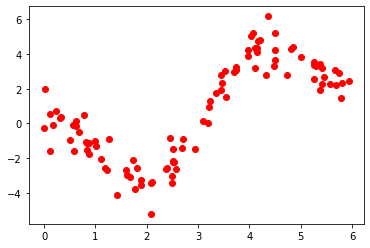

In [127]:
# Plot data
%matplotlib inline

plt.scatter(x_train, y_train, c='r')
plt.show()

In [128]:
# Define the basis functions
def phi(x):
    n_samples = len(x)
    return np.matrix([np.ones(n_samples), x]).T
    #return np.matrix([np.ones(n_samples), x, x**2]).T
    #return np.matrix([np.ones(n_samples), x, x**2, x**3]).T
    #return np.matrix([np.ones(n_samples), x, x**2, x**3, x**4]).T
    #return np.matrix([np.ones(n_samples), x, x**2, x**3, x**4, x**5, x**6, x**7, x**8, x**9]).T
    #return np.matrix([np.ones(n_samples), x, np.sin(x), np.cos(x), np.cos(2*x), np.sin(2*x), np.cos(3*x), np.sin(3*x)]).T

In [129]:
# Transform data to high dimensional space
X = phi(x_train)
Y = np.matrix(y_train).T
X

matrix([[1.00000000e+00, 2.50213203e+00],
        [1.00000000e+00, 4.32194696e+00],
        [1.00000000e+00, 6.86248904e-04],
        [1.00000000e+00, 1.81399544e+00],
        [1.00000000e+00, 8.80535345e-01],
        [1.00000000e+00, 5.54031569e-01],
        [1.00000000e+00, 1.11756127e+00],
        [1.00000000e+00, 2.07336436e+00],
        [1.00000000e+00, 2.38060485e+00],
        [1.00000000e+00, 3.23290040e+00],
        [1.00000000e+00, 2.51516709e+00],
        [1.00000000e+00, 4.11131700e+00],
        [1.00000000e+00, 1.22671350e+00],
        [1.00000000e+00, 5.26870462e+00],
        [1.00000000e+00, 1.64325559e-01],
        [1.00000000e+00, 4.02280506e+00],
        [1.00000000e+00, 2.50382881e+00],
        [1.00000000e+00, 3.35213897e+00],
        [1.00000000e+00, 8.42321632e-01],
        [1.00000000e+00, 1.18860893e+00],
        [1.00000000e+00, 4.80446741e+00],
        [1.00000000e+00, 5.80956945e+00],
        [1.00000000e+00, 1.88054507e+00],
        [1.00000000e+00, 4.1539356

In [130]:
# Multiple the design matrix X with its transpose
XTX = X.T*X
XTX

matrix([[ 100.        ,  291.52675656],
        [ 291.52675656, 1161.89869734]])

In [131]:
# Inverse XTX
XTX_inv = np.linalg.inv(XTX)
XTX_inv

matrix([[ 0.03723793, -0.0093432 ],
        [-0.0093432 ,  0.00320492]])

In [132]:
# Check that the inverse is sensible
XTX*XTX_inv

matrix([[1.00000000e+00, 2.95410699e-17],
        [2.55409495e-16, 1.00000000e+00]])

In [133]:
# Compute the numerator
XTy = X.T*Y
XTy

matrix([[ 67.76842285],
        [530.87336684]])

In [134]:
# Solve the weights
w = XTX_inv*XTy
w

matrix([[-2.43650086],
        [ 1.06823303]])

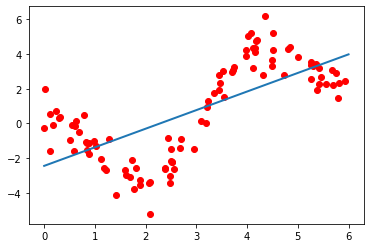

Training error: 3.963


In [135]:
# Plot the learned model
x_grid = np.linspace(0, 6, 121)
y_pred = w.T*phi(x_grid).T

plt.plot(x_grid, np.asarray(y_pred)[0], linewidth=2)
plt.scatter(x_train, y_train, c='red')
plt.show()

pred = (w.T*X.T).T
mse = mean_squared_error(pred, y_train)
print('Training error: %.3f' % mse)

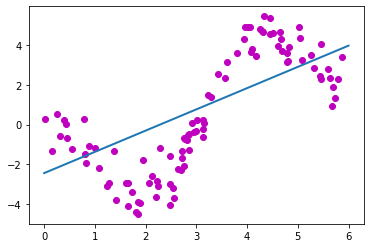

Validation error: 4.337


In [136]:
# Generate new samples and plot with the learned curve
np.random.seed(7)

x_val, y_val = sampleF(n_samples, interval=interval, sigma=sigma)

plt.plot(x_grid, np.asarray(y_pred)[0], linewidth=2)
plt.scatter(x_val, y_val, c='m')
plt.show()

pred = (w.T*phi(x_val).T).T
mse = mean_squared_error(pred, y_val)
print('Validation error: %.3f' % mse)

# Effect of regularization

In [137]:
# L2 Regularization
l = 1 # lambda parameter specifying the strength of regularization
I = np.identity(X.shape[1])

w_reg = np.linalg.inv(XTX + l*I)*XTy # Weights with regularization
w_reg

matrix([[-2.33963254],
        [ 1.04303054]])

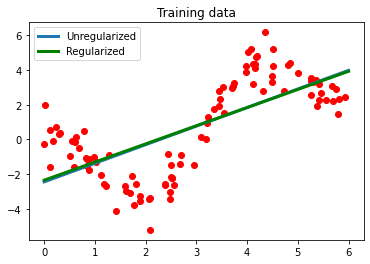

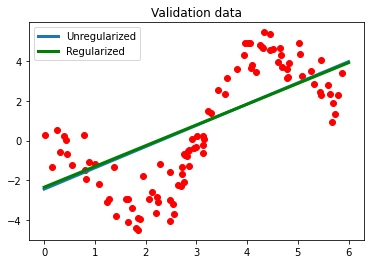

Training error after regularization: 3.965
Validation error after regularization: 4.388


In [138]:
# Plot the regression lines
y_pred_reg = w_reg.T*phi(x_grid).T

plt.figure()

plt.scatter(x_train, y_train, c='red')
plt.plot(x_grid, np.asarray(y_pred)[0], linewidth=3)
plt.plot(x_grid, np.asarray(y_pred_reg)[0], c='g', linewidth=3)
plt.legend(['Unregularized', 'Regularized'])
plt.title('Training data')

plt.figure()

plt.scatter(x_val, y_val, c='red')
plt.plot(x_grid, np.asarray(y_pred)[0], linewidth=3)
plt.plot(x_grid, np.asarray(y_pred_reg)[0], c='g', linewidth=3)
plt.legend(['Unregularized', 'Regularized'])
plt.title('Validation data')

plt.show()

pred = (w_reg.T*phi(x_train).T).T
mse = mean_squared_error(pred, y_train)
print('Training error after regularization: %.3f' % mse)

pred = (w_reg.T*phi(x_val).T).T
mse = mean_squared_error(pred, y_val)
print('Validation error after regularization: %.3f' % mse)